In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Get the current working directory
cwd = os.getcwd()

# Get the path to the project's root directory
root_path = os.path.abspath(os.path.join(cwd, os.pardir))

# Add the project's root directory to the Python module search path
sys.path.append(root_path)

## Example

Given a system of linear equations represented as a square matrix $A$, one of the key operations is finding its inverse $A^{-1}$, which allows us to solve the system with more ease. In order to find $A^{-1}$, the matrix $A$ must be invertible, i.e., it should have a nonzero determinant.

To find the inverse of $A$, we typically use the Gauss-Jordan elimination method. This method starts with the augmented matrix $[A|I]$, where $I$ is the identity matrix of the same size as $A$. Gauss-Jordan elimination involves three types of operations:

1. Swapping two rows,
2. Multiplying a row by a non-zero scalar,
3. Adding a multiple of one row to another row.

By applying these operations, the aim is to transform $A$ into the identity matrix. After these operations, the original identity matrix $I$ transforms into $A^{-1}$, the inverse of $A$.

Given a matrix $A = \begin{bmatrix} 2 & 3 \\ 4 & -1 \end{bmatrix}$, the following Python code demonstrates how to compute its inverse using the Gauss-Jordan elimination method and visualizes the process.

In [2]:
from implementation.inverse_matrix import inverse_matrix


def plot_matrix(matrix, name=""):
    # Converting the matrix into a DataFrame
    df = pd.DataFrame(matrix)

    # Converting all columns to float
    df = df.astype(np.float64)

    # Converting DataFrame to string and hiding index and columns
    df_str = df.to_string(float_format="{:.2f}".format, index=False, header=False)

    print(f"{name} matrix:")
    print(f"{df_str}\n")


# Create a 2D array
matrix = np.array([[2, 3], [4, -1]])
inverse = inverse_matrix(np.copy(matrix))

# Plot original matrix
plot_matrix(matrix)
# Plot inverse matrix
plot_matrix(inverse)

 matrix:
2.00  3.00
4.00 -1.00

 matrix:
0.07  0.21
0.29 -0.14



Consider a system of linear equations that can be represented in matrix form as $Ax = b$, where $A$ is a matrix of coefficients, $x$ is a vector of variables, and $b$ is a vector of constants.

Our goal is to find the solution to this system of equations that satisfies all equations simultaneously. A common way to achieve this is by calculating the inverse of the matrix $A$, denoted as $A^{-1}$, and then multiplying it with the vector $b$ to find the vector of variables $x$. This is because the multiplication of a matrix by its inverse results in the identity matrix $I$, leading to the equation $Ix = b$, which simplifies to $x = b$.

To calculate the inverse of a matrix, we use the Gauss-Jordan elimination method. This involves creating an augmented matrix $[A|I]$, where $I$ is the identity matrix, and then performing row operations until $A$ is transformed into the identity matrix $I$. The right half of the final augmented matrix will be $A^{-1}$.

Once we have $A^{-1}$, we can easily solve the system of equations by multiplying $A^{-1}$ with $b$ to get $x$.

In addition, we want to visually represent this system of equations and its solution in a two-dimensional plane. Each equation can be represented as a line in this plane, and the solution to the system is the point where all lines intersect.

The Python code provided below does exactly this. It first plots each equation as a line in the 2D plane. The $x$ values are generated using the \texttt{numpy.linspace} function to create an array of evenly spaced values within a specified range. For each $x$ value, the corresponding $y$ value is calculated by rearranging the equation to the form $y = (b - Ax) / A$, where $A$ and $b$ are the coefficients and constants from the matrix and vector respectively.

After plotting all the lines, the code uses the \texttt{solve\_inverse\_matrix} function to find the solution for $x$. This solution is then plotted as a red point on the graph.

Given a matrix $A = \begin{bmatrix} 2 & 3 \\ 4 & -1 \end{bmatrix}$ and a vector $b = \begin{bmatrix} 12 \\ 10 \end{bmatrix}$, the Python code will plot the corresponding system of equations and its solution.

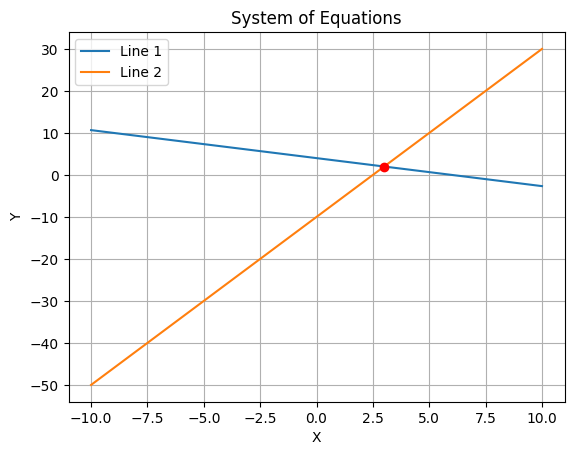

In [3]:
from implementation.inverse_matrix import solve_inverse_matrix


def plot_system_of_equations(A, b):
    """Plot a system of equations defined by matrix A and vector b."""

    # Generate a range of x values
    x_values = np.linspace(-10, 10, 400)

    # Plot each equation
    for i in range(A.shape[0]):
        # Calculate the corresponding y values
        y_values = (b[i] - A[i, 0] * x_values) / A[i, 1]
        plt.plot(x_values, y_values, label=f"Line {i+1}")

    # Solve the system of equations for x
    x = solve_inverse_matrix(A, b)

    # Plot the solution
    plt.plot(x[0], x[1], "ro")  # solution point

    # Set the labels and title
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("System of Equations")

    # Show the legend
    plt.legend()

    # Show the plot
    plt.grid()
    plt.show()


A = np.array([[2, 3], [4, -1]])
b = np.array([12, 10])
plot_system_of_equations(A, b)